In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
import os

In [3]:
os.getcwd()

'c:\\Users\\HP\\Desktop\\Machine Learning Programing with prajwal'

In [5]:
os.chdir('C:\\Users\\HP\\Downloads\\Batch 93 Day27\\')

In [6]:
df1=pd.read_csv('50_Startups.csv')
print(df1)

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42  California  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68    New York  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95  California  146121.95
11  100671.96        91790.61        249744.55     Florida  144259.40
12   93863.75       127320.38        249839.44  California  141585.52
13   91992.39       

In [8]:
x=df1.iloc[:,:-1].values
x

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'California'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'New York'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'California'],
       [100671.96, 91790.61, 249744.55, 'Florida'],
       [93863.75, 127320.38, 249839.44, 'California'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79

In [9]:
y=df1.iloc[:,-1].values
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [10]:
from sklearn.preprocessing import LabelEncoder
Label=LabelEncoder()
x[:,3]=Label.fit_transform(x[:,3])
print(x)

[[165349.2 136897.8 471784.1 2]
 [162597.7 151377.59 443898.53 0]
 [153441.51 101145.55 407934.54 1]
 [144372.41 118671.85 383199.62 2]
 [142107.34 91391.77 366168.42 0]
 [131876.9 99814.71 362861.36 2]
 [134615.46 147198.87 127716.82 0]
 [130298.13 145530.06 323876.68 2]
 [120542.52 148718.95 311613.29 2]
 [123334.88 108679.17 304981.62 0]
 [101913.08 110594.11 229160.95 0]
 [100671.96 91790.61 249744.55 1]
 [93863.75 127320.38 249839.44 0]
 [91992.39 135495.07 252664.93 0]
 [119943.24 156547.42 256512.92 1]
 [114523.61 122616.84 261776.23 2]
 [78013.11 121597.55 264346.06 0]
 [94657.16 145077.58 282574.31 2]
 [91749.16 114175.79 294919.57 2]
 [86419.7 153514.11 0.0 1]
 [76253.86 113867.3 298664.47 0]
 [78389.47 153773.43 299737.29 2]
 [73994.56 122782.75 303319.26 0]
 [67532.53 105751.03 304768.73 0]
 [77044.01 99281.34 140574.81 2]
 [64664.71 139553.16 137962.62 0]
 [75328.87 144135.98 134050.07 2]
 [72107.6 127864.55 353183.81 2]
 [66051.52 182645.56 118148.2 1]
 [65605.48 153032.0

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')
x=np.array(ct.fit_transform(x))
print(x)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [1.0 0.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 0.0 1.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [1.0 0.0 0.0 101913.08 110594.11 229160.95]
 [0.0 1.0 0.0 100671.96 91790.61 249744.55]
 [1.0 0.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 0.0 1.0 91749.16 114175.79 294919.57]
 [0.0 1.0 0.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [1.0 0.0 0.0 73994.56 122782.75 3

In [12]:
print(pd.DataFrame(x))

      0    1    2          3          4          5
0   0.0  0.0  1.0   165349.2   136897.8   471784.1
1   1.0  0.0  0.0   162597.7  151377.59  443898.53
2   0.0  1.0  0.0  153441.51  101145.55  407934.54
3   0.0  0.0  1.0  144372.41  118671.85  383199.62
4   1.0  0.0  0.0  142107.34   91391.77  366168.42
5   0.0  0.0  1.0   131876.9   99814.71  362861.36
6   1.0  0.0  0.0  134615.46  147198.87  127716.82
7   0.0  0.0  1.0  130298.13  145530.06  323876.68
8   0.0  0.0  1.0  120542.52  148718.95  311613.29
9   1.0  0.0  0.0  123334.88  108679.17  304981.62
10  1.0  0.0  0.0  101913.08  110594.11  229160.95
11  0.0  1.0  0.0  100671.96   91790.61  249744.55
12  1.0  0.0  0.0   93863.75  127320.38  249839.44
13  1.0  0.0  0.0   91992.39  135495.07  252664.93
14  0.0  1.0  0.0  119943.24  156547.42  256512.92
15  0.0  0.0  1.0  114523.61  122616.84  261776.23
16  1.0  0.0  0.0   78013.11  121597.55  264346.06
17  0.0  0.0  1.0   94657.16  145077.58  282574.31
18  0.0  0.0  1.0   91749.16  1

In [13]:
from sklearn.model_selection import train_test_split
train_test_split(x,y) 

[array([[0.0, 1.0, 0.0, 1315.46, 115816.21, 297114.46],
        [1.0, 0.0, 0.0, 0.0, 116983.8, 45173.06],
        [1.0, 0.0, 0.0, 142107.34, 91391.77, 366168.42],
        [1.0, 0.0, 0.0, 64664.71, 139553.16, 137962.62],
        [0.0, 1.0, 0.0, 66051.52, 182645.56, 118148.2],
        [1.0, 0.0, 0.0, 27892.92, 84710.77, 164470.71],
        [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
        [1.0, 0.0, 0.0, 76253.86, 113867.3, 298664.47],
        [0.0, 0.0, 1.0, 91749.16, 114175.79, 294919.57],
        [1.0, 0.0, 0.0, 0.0, 135426.92, 0.0],
        [0.0, 0.0, 1.0, 542.05, 51743.15, 0.0],
        [1.0, 0.0, 0.0, 93863.75, 127320.38, 249839.44],
        [1.0, 0.0, 0.0, 63408.86, 129219.61, 46085.25],
        [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
        [1.0, 0.0, 0.0, 67532.53, 105751.03, 304768.73],
        [0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
        [1.0, 0.0, 0.0, 38558.51, 82982.09, 174999.3],
        [0.0, 0.0, 1.0, 61994.48, 115641.28, 91131.24],
        [

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_tarin,y_test=train_test_split(x,y,test_size=0.05)
display(x_test)

array([[1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 100671.96, 91790.61, 249744.55]], dtype=object)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05)
display(x_test)

array([[1.0, 0.0, 0.0, 0.0, 135426.92, 0.0],
       [1.0, 0.0, 0.0, 22177.74, 154806.14, 28334.72],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93]], dtype=object)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05,random_state=42)
display(x_test)

array([[1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [1.0, 0.0, 0.0, 38558.51, 82982.09, 174999.3],
       [0.0, 0.0, 1.0, 61994.48, 115641.28, 91131.24]], dtype=object)

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05,random_state=42)
display(x_test)

array([[1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [1.0, 0.0, 0.0, 38558.51, 82982.09, 174999.3],
       [0.0, 0.0, 1.0, 61994.48, 115641.28, 91131.24]], dtype=object)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
x_test.shape

(10, 6)

In [20]:
x_train.shape

(40, 6)

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print('X Shape -',x.shape)
print('Y Shape -',y.shape)
print('X_Train Shape -',x_train.shape)
print('Y_Train Shape -',y_train.shape)
print('X_Test Shape -',x_test.shape)
print('Y_Test Shape -',y_test.shape)

X Shape - (50, 6)
Y Shape - (50,)
X_Train Shape - (40, 6)
Y_Train Shape - (40,)
X_Test Shape - (10, 6)
Y_Test Shape - (10,)


In [22]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr)

LinearRegression()


In [23]:
y_pred=lr.predict(x_test)
print(y_pred)

[125685.70020548  84338.92317127  99390.93658773  46818.58913869
 128971.45588833  52062.29882127 109174.11382466  99985.2596175
  97162.65075526 115228.18387689]


In [24]:
y_test

array([134307.35,  81005.76,  99937.59,  64926.08, 125370.37,  35673.41,
       105733.54, 107404.34,  97427.84, 122776.86])

In [25]:
result=pd.concat([pd.DataFrame(y_pred,columns=['Prediction']),pd.DataFrame(y_test,columns=['Y_Test'])],axis=1)
result['Difference']=y_test-y_pred
print(result)

      Prediction     Y_Test    Difference
0  125685.700205  134307.35   8621.649795
1   84338.923171   81005.76  -3333.163171
2   99390.936588   99937.59    546.653412
3   46818.589139   64926.08  18107.490861
4  128971.455888  125370.37  -3601.085888
5   52062.298821   35673.41 -16388.888821
6  109174.113825  105733.54  -3440.573825
7   99985.259617  107404.34   7419.080383
8   97162.650755   97427.84    265.189245
9  115228.183877  122776.86   7548.676123


In [26]:
y_pre=pd.DataFrame(y_pred,columns=['Prediction'])
y_te=pd.DataFrame(y_test,columns=['Actual'])
x_te=pd.DataFrame(x_test,columns=['CF','FR','New Y','R&D','Admin','Mark'])
result=pd.concat([y_te,x_te,y_pre],axis=1)
result['Differnce']=y_pre['Prediction']-y_te['Actual']
display(result)

,Actual,CF,FR,New Y,R&D,Admin,Mark,Prediction,Differnce
0,134307.35,1.0,0.0,0.0,91992.39,135495.07,252664.93,125685.700205,-8621.649795
1,81005.76,1.0,0.0,0.0,38558.51,82982.09,174999.3,84338.923171,3333.163171
2,99937.59,0.0,0.0,1.0,61994.48,115641.28,91131.24,99390.936588,-546.653412
3,64926.08,0.0,0.0,1.0,1000.23,124153.04,1903.93,46818.589139,-18107.490861
4,125370.37,0.0,0.0,1.0,94657.16,145077.58,282574.31,128971.455888,3601.085888
5,35673.41,0.0,0.0,1.0,542.05,51743.15,0.0,52062.298821,16388.888821
6,105733.54,0.0,0.0,1.0,75328.87,144135.98,134050.07,109174.113825,3440.573825
7,107404.34,1.0,0.0,0.0,64664.71,139553.16,137962.62,99985.259617,-7419.080383
8,97427.84,1.0,0.0,0.0,63408.86,129219.61,46085.25,97162.650755,-265.189245
9,122776.86,0.0,1.0,0.0,86419.7,153514.11,0.0,115228.183877,-7548.676123


In [27]:
accuarcy=r2_score(y_test,y_pred)
print(accuarcy)

0.8988481687286216


In [28]:
lr.coef_

array([-1.22767929e+03,  1.42750258e+03, -1.99823287e+02,  8.09359318e-01,
       -7.82867439e-02,  2.84635373e-02])

In [29]:
lr.intercept_

55874.211624819

In [30]:
#prediction is happening ok prajwal.....
-1.22767929e+03+0+0+8.09359318e-01*38558.51+-7.82867439e-02*82982.09+2.84635373e-02*174999.3+55874.211624819


84338.92316642232

In [31]:
display(result)

,Actual,CF,FR,New Y,R&D,Admin,Mark,Prediction,Differnce
0,134307.35,1.0,0.0,0.0,91992.39,135495.07,252664.93,125685.700205,-8621.649795
1,81005.76,1.0,0.0,0.0,38558.51,82982.09,174999.3,84338.923171,3333.163171
2,99937.59,0.0,0.0,1.0,61994.48,115641.28,91131.24,99390.936588,-546.653412
3,64926.08,0.0,0.0,1.0,1000.23,124153.04,1903.93,46818.589139,-18107.490861
4,125370.37,0.0,0.0,1.0,94657.16,145077.58,282574.31,128971.455888,3601.085888
5,35673.41,0.0,0.0,1.0,542.05,51743.15,0.0,52062.298821,16388.888821
6,105733.54,0.0,0.0,1.0,75328.87,144135.98,134050.07,109174.113825,3440.573825
7,107404.34,1.0,0.0,0.0,64664.71,139553.16,137962.62,99985.259617,-7419.080383
8,97427.84,1.0,0.0,0.0,63408.86,129219.61,46085.25,97162.650755,-265.189245
9,122776.86,0.0,1.0,0.0,86419.7,153514.11,0.0,115228.183877,-7548.676123


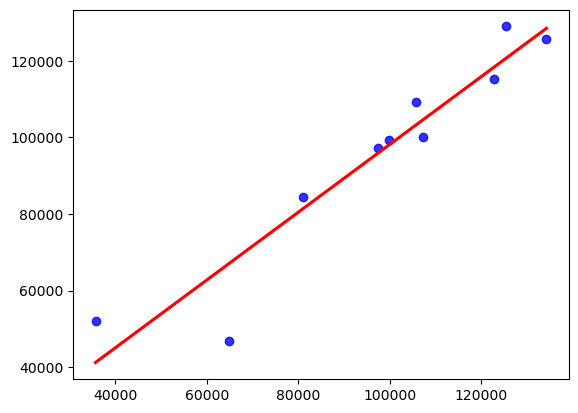

In [32]:
import seaborn as sns
sns.regplot(x= y_test,y=y_pred,scatter_kws={"color":"b"},
            line_kws={"color":"r"},ci=None)
plt.show()


In [33]:
y_fpred=lr.predict(x)
print(y_fpred)

[192212.66545468 187030.55971063 185183.93437002 174140.32762984
 172930.11655401 164924.33544171 155710.36151199 158957.99543858
 150463.49430464 154641.48410322 134995.5117714  138704.12846331
 127759.84928263 125685.70020548 149424.57045841 146216.94359658
 115791.91754095 128971.45588833 129388.42927956 115228.18387689
 115950.05160435 115612.79873554 113555.99633348 109700.50708279
 114259.51926276  99985.2596175  109174.11382466 114078.10758204
  99825.31692071  99841.95049281  99390.93658773  95712.15395369
  97162.65075526  98630.16447031  88531.79037817  92107.93605122
  74651.63335333  91908.32121706  72157.84688138  84338.92317127
  76212.09086728  75271.61487554  70462.80150005  59263.1780714
  61283.530578    46818.58913869  57756.44854214  44044.39972198
  52062.29882127  46774.0366118 ]


In [34]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [35]:
# Disply the results with the diffrence
y_fpred=pd.DataFrame(y_fpred,columns=['Prediction'])
result=pd.concat([df1,y_fpred],axis=1)
result["Differnrce"]=result['Profit']-result['Prediction']
display(result)

,R&D Spend,Administration,Marketing Spend,State,Profit,Prediction,Differnrce
0,165349.20,136897.80,471784.10,New York,192261.83,192212.665455,49.164545
1,162597.70,151377.59,443898.53,California,191792.06,187030.559711,4761.500289
2,153441.51,101145.55,407934.54,Florida,191050.39,185183.934370,5866.455630
3,144372.41,118671.85,383199.62,New York,182901.99,174140.327630,8761.662370
4,142107.34,91391.77,366168.42,California,166187.94,172930.116554,-6742.176554
5,131876.90,99814.71,362861.36,New York,156991.12,164924.335442,-7933.215442
6,134615.46,147198.87,127716.82,California,156122.51,155710.361512,412.148488
7,130298.13,145530.06,323876.68,New York,155752.60,158957.995439,-3205.395439
8,120542.52,148718.95,311613.29,New York,152211.77,150463.494305,1748.275695
9,123334.88,108679.17,304981.62,California,149759.96,154641.484103,-4881.524103


In [36]:
r2_score(y_fpred,y)

0.9474842804290184

In [37]:
x

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1.0, 0.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [1.0, 0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [0.0, 0.0, 1.0, 130298.13, 145530.06, 323876.68],
       [0.0, 0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [1.0, 0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [1.0, 0.0, 0.0, 101913.08, 110594.11, 229160.95],
       [0.0, 1.0, 0.0, 100671.96, 91790.61, 249744.55],
       [1.0, 0.0, 0.0, 93863.75, 127320.38, 249839.44],
       [1.0, 0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [0.0, 1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [1.0, 0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 0.0, 1.0, 94657.16, 145077.58

In [38]:
print(x.dtype)

object


In [39]:
x.astype('int')

array([[     0,      0,      1, 165349, 136897, 471784],
       [     1,      0,      0, 162597, 151377, 443898],
       [     0,      1,      0, 153441, 101145, 407934],
       [     0,      0,      1, 144372, 118671, 383199],
       [     1,      0,      0, 142107,  91391, 366168],
       [     0,      0,      1, 131876,  99814, 362861],
       [     1,      0,      0, 134615, 147198, 127716],
       [     0,      0,      1, 130298, 145530, 323876],
       [     0,      0,      1, 120542, 148718, 311613],
       [     1,      0,      0, 123334, 108679, 304981],
       [     1,      0,      0, 101913, 110594, 229160],
       [     0,      1,      0, 100671,  91790, 249744],
       [     1,      0,      0,  93863, 127320, 249839],
       [     1,      0,      0,  91992, 135495, 252664],
       [     0,      1,      0, 119943, 156547, 256512],
       [     0,      0,      1, 114523, 122616, 261776],
       [     1,      0,      0,  78013, 121597, 264346],
       [     0,      0,      1,

In [40]:
x=x.astype('float64')
x

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
        1.1867185e+05, 3.8319962e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.4210734e+05,
        9.1391770e+04, 3.6616842e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.3187690e+05,
        9.9814710e+04, 3.6286136e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.3461546e+05,
        1.4719887e+05, 1.2771682e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.3029813e+05,
        1.4553006e+05, 3.2387668e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.2054252e+05,
        1.4871895e+05, 3.1161329e+05],
       [1.0000000e+00, 0.0000000e+00,

In [41]:
print(x.dtype)

float64


In [42]:
# Ordinary least square Method.....
import statsmodels.api as sm
reg_ols=sm.OLS(endog=y,exog=x)
reg_ols=reg_ols.fit()
print(reg_ols.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     171.2
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           1.14e-27
Time:                        18:42:10   Log-Likelihood:                -525.19
No. Observations:                  50   AIC:                             1062.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          5.062e+04   6806.869      7.436      0.0

In [44]:
x_opt=x[:,[0,1,2,3,5]]
import statsmodels.api as sm
reg_ols=sm.OLS(endog=y,exog=x_opt)
reg_ols=reg_ols.fit()
print(reg_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     216.9
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           8.77e-29
Time:                        18:42:13   Log-Likelihood:                -525.42
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          4.681e+04   3130.528     14.954      0.0

In [45]:
x_opt=x[:,[0,1,2,3]]
import statsmodels.api as sm
reg_ols=sm.OLS(endog=y,exog=x_opt)
reg_ols=reg_ols.fit()
print(reg_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     272.7
Date:                Fri, 05 Apr 2024   Prob (F-statistic):           2.70e-29
Time:                        18:42:14   Log-Likelihood:                -527.33
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      46   BIC:                             1070.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           4.88e+04   3029.803     16.108      0.0

In [46]:
pd.DataFrame(x_opt)

,0,1,2,3
0,0.0,0.0,1.0,165349.20
1,1.0,0.0,0.0,162597.70
2,0.0,1.0,0.0,153441.51
3,0.0,0.0,1.0,144372.41
4,1.0,0.0,0.0,142107.34
5,0.0,0.0,1.0,131876.90
6,1.0,0.0,0.0,134615.46
7,0.0,0.0,1.0,130298.13
8,0.0,0.0,1.0,120542.52
9,1.0,0.0,0.0,123334.88


In [47]:
x_opt=x[:,[3]]
import statsmodels.api as sm
reg_ols=sm.OLS(endog=y,exog=x_opt)
reg_ols=reg_ols.fit()
print(reg_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                              878.4
Date:                Fri, 05 Apr 2024   Prob (F-statistic):                    6.00e-33
Time:                        18:42:19   Log-Likelihood:                         -581.74
No. Observations:                  50   AIC:                                      1165.
Df Residuals:                      49   BIC:                                      1167.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [48]:
x_opt=x[:,[4]]
import statsmodels.api as sm
reg_ols=sm.OLS(endog=y,exog=x_opt)
reg_ols=reg_ols.fit()
print(reg_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.871
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                              331.2
Date:                Fri, 05 Apr 2024   Prob (F-statistic):                    1.92e-23
Time:                        18:42:22   Log-Likelihood:                         -604.03
No. Observations:                  50   AIC:                                      1210.
Df Residuals:                      49   BIC:                                      1212.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [49]:
x_opt

array([[136897.8 ],
       [151377.59],
       [101145.55],
       [118671.85],
       [ 91391.77],
       [ 99814.71],
       [147198.87],
       [145530.06],
       [148718.95],
       [108679.17],
       [110594.11],
       [ 91790.61],
       [127320.38],
       [135495.07],
       [156547.42],
       [122616.84],
       [121597.55],
       [145077.58],
       [114175.79],
       [153514.11],
       [113867.3 ],
       [153773.43],
       [122782.75],
       [105751.03],
       [ 99281.34],
       [139553.16],
       [144135.98],
       [127864.55],
       [182645.56],
       [153032.06],
       [115641.28],
       [152701.92],
       [129219.61],
       [103057.49],
       [157693.92],
       [ 85047.44],
       [127056.21],
       [ 51283.14],
       [ 65947.93],
       [ 82982.09],
       [118546.05],
       [ 84710.77],
       [ 96189.63],
       [127382.3 ],
       [154806.14],
       [124153.04],
       [115816.21],
       [135426.92],
       [ 51743.15],
       [116983.8 ]])

In [50]:
x_opt=x[:,[5]]
import statsmodels.api as sm
reg_ols=sm.OLS(endog=y,exog=x_opt)
reg_ols=reg_ols.fit()
print(reg_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.887
Model:                            OLS   Adj. R-squared (uncentered):              0.885
Method:                 Least Squares   F-statistic:                              385.8
Date:                Fri, 05 Apr 2024   Prob (F-statistic):                    7.10e-25
Time:                        18:42:25   Log-Likelihood:                         -600.68
No. Observations:                  50   AIC:                                      1203.
Df Residuals:                      49   BIC:                                      1205.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [51]:
x_opt=x[:,[3]]
x_opt

array([[165349.2 ],
       [162597.7 ],
       [153441.51],
       [144372.41],
       [142107.34],
       [131876.9 ],
       [134615.46],
       [130298.13],
       [120542.52],
       [123334.88],
       [101913.08],
       [100671.96],
       [ 93863.75],
       [ 91992.39],
       [119943.24],
       [114523.61],
       [ 78013.11],
       [ 94657.16],
       [ 91749.16],
       [ 86419.7 ],
       [ 76253.86],
       [ 78389.47],
       [ 73994.56],
       [ 67532.53],
       [ 77044.01],
       [ 64664.71],
       [ 75328.87],
       [ 72107.6 ],
       [ 66051.52],
       [ 65605.48],
       [ 61994.48],
       [ 61136.38],
       [ 63408.86],
       [ 55493.95],
       [ 46426.07],
       [ 46014.02],
       [ 28663.76],
       [ 44069.95],
       [ 20229.59],
       [ 38558.51],
       [ 28754.33],
       [ 27892.92],
       [ 23640.93],
       [ 15505.73],
       [ 22177.74],
       [  1000.23],
       [  1315.46],
       [     0.  ],
       [   542.05],
       [     0.  ]])

In [52]:
x=x[:,[3]]
from sklearn.model_selection import train_test_split
x_opt_train,x_opt_test,y_train,y_test=train_test_split(x_opt,y,test_size=0.2,random_state=42)
print(x_opt.shape)
print(y.shape)
print(x_opt_train.shape)
print(x_opt_test.shape)
print(y_train.shape)
print(y_test.shape)

(50, 1)
(50,)
(40, 1)
(10, 1)
(40,)
(10,)


In [53]:
# Prajwal creat your model.....

from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_opt_train,y_train)
print(reg)

LinearRegression()


In [54]:
#prediction
yopt_pred=reg.predict(x_opt_test)
print(yopt_pred)

[127862.20996405  82250.56334619 102255.72078164  50190.4734756
 130136.88190548  49799.36685472 113638.0775288  104535.0534288
 103463.04843113 123105.31102669]


In [55]:
result=pd.concat([pd.DataFrame(yopt_pred,columns=['Prediction']),pd.DataFrame(y_test,columns=['Y_Test'])],axis=1)
result['Difference']=result['Y_Test']-result['Prediction']
print(result)

      Prediction     Y_Test    Difference
0  127862.209964  134307.35   6445.140036
1   82250.563346   81005.76  -1244.803346
2  102255.720782   99937.59  -2318.130782
3   50190.473476   64926.08  14735.606524
4  130136.881905  125370.37  -4766.511905
5   49799.366855   35673.41 -14125.956855
6  113638.077529  105733.54  -7904.537529
7  104535.053429  107404.34   2869.286571
8  103463.048431   97427.84  -6035.208431
9  123105.311027  122776.86   -328.451027


In [ ]:
""""  Prediction     Y_Test    Difference
0  125685.700205  134307.35   8621.649795
1   84338.923171   81005.76  -3333.163171
2   99390.936588   99937.59    546.653412
3   46818.589139   64926.08  18107.490861
4  128971.455888  125370.37  -3601.085888
5   52062.298821   35673.41 -16388.888821
6  109174.113825  105733.54  -3440.573825
7   99985.259617  107404.34   7419.080383
8   97162.650755   97427.84    265.189245
9  115228.183877  122776.86   7548.676123
"""""

In [56]:
accuracy=r2_score(y_test,yopt_pred)
print(accuracy)

0.9265108109341951


In [57]:
# Prediction for all 50 records
yfull_pred=reg.predict(x_opt)
print(yfull_pred)

[190480.25107829 188131.54561896 180315.73844483 172574.27208786
 170640.7877067  161907.99094882 164245.6507063  160560.33849815
 152232.86095279 154616.44488025 136330.60130088 135271.16996536
 129459.61990349 127862.20996405 151721.31008683 147095.06455947
 115929.36923955 130136.88190548 127654.58662083 123105.31102669
 114427.65741716 116250.63356326 112499.09836055 106983.05069951
 115102.13665346 104535.0534288  113638.0775288  110888.37211903
 105718.84707519 105338.10326888 102255.72078164 101523.23880648
 103463.04843113  96706.80916997  88966.38421611  88614.65458336
  73804.31462961  86955.17872572  66604.83030328  82250.56334619
  73881.62600648  73146.31858518  69516.78119611  62572.50038466
  68267.78888609  50190.4734756   50459.55667456  49336.66803799
  49799.36685472  49336.66803799]


In [58]:
accuracy=r2_score(y,yfull_pred)
accuracy

0.9464943582068932

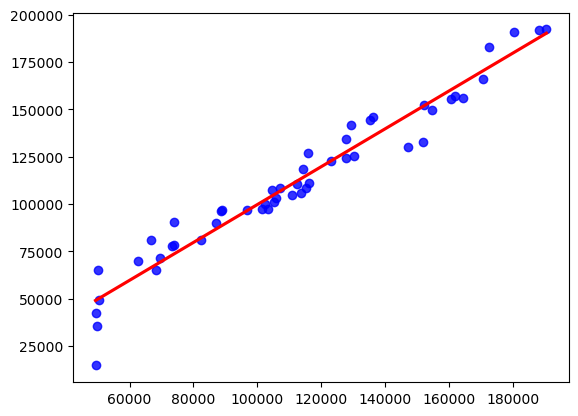

In [59]:
# Print the result as Graph
import seaborn as sns
sns.regplot(x=yfull_pred,y=y,scatter_kws={"color":"b"},line_kws={"color":"r"},ci=None)
plt.show()

In [60]:
# Prediction for New Data Set......
df_predict=pd.read_csv('50_Startups_Predictions.csv')
print(df_predict)

    R&D Spend  Administration  Marketing Spend       State
0   120542.52       148718.95        311613.29    New York
1   123334.88       108679.17        304981.62  California
2   101913.08       110594.11        229160.95  California
3   100671.96        91790.61        249744.55     Florida
4    93863.75       127320.38        249839.44  California
5    91992.39       135495.07        252664.93  California
6   119943.24       156547.42        256512.92     Florida
7   114523.61       122616.84        261776.23    New York
8    78013.11       121597.55        264346.06  California
9    72107.60       127864.55        353183.81    New York
10   66051.52       182645.56        118148.20     Florida
11   65605.48       153032.06        107138.38    New York
12   61994.48       115641.28         91131.24    New York
13   61136.38       152701.92         88218.23    New York
14   63408.86       129219.61         46085.25  California
15   55493.95       103057.49        214634.81    New Yo

In [61]:
print(df_predict.count())

R&D Spend          28
Administration     28
Marketing Spend    28
State              28
dtype: int64


In [62]:
x_pred=df_predict.iloc[:,0:1].values
print(x_pred)

[[120542.52]
 [123334.88]
 [101913.08]
 [100671.96]
 [ 93863.75]
 [ 91992.39]
 [119943.24]
 [114523.61]
 [ 78013.11]
 [ 72107.6 ]
 [ 66051.52]
 [ 65605.48]
 [ 61994.48]
 [ 61136.38]
 [ 63408.86]
 [ 55493.95]
 [ 46426.07]
 [ 46014.02]
 [ 28663.76]
 [ 44069.95]
 [ 20229.59]
 [ 38558.51]
 [ 22177.74]
 [  1000.23]
 [  1315.46]
 [     0.  ]
 [   542.05]
 [     0.  ]]


In [63]:
yone_Predict=reg.predict(x_pred)
print(yone_Predict)

[152232.86095279 154616.44488025 136330.60130088 135271.16996536
 129459.61990349 127862.20996405 151721.31008683 147095.06455947
 115929.36923955 110888.37211903 105718.84707519 105338.10326888
 102255.72078164 101523.23880648 103463.04843113  96706.80916997
  88966.38421611  88614.65458336  73804.31462961  86955.17872572
  66604.83030328  82250.56334619  68267.78888609  50190.4734756
  50459.55667456  49336.66803799  49799.36685472  49336.66803799]


In [64]:
# Display the result as Data Frame-with X

yone_Predict=pd.DataFrame(yone_Predict,columns=['Prediction'])
result=pd.concat([df_predict,yone_Predict],axis=1)
result.to_excel('prajwalghotkar_MLR_Regression_Future.xlsx')
print(result)

    R&D Spend  Administration  Marketing Spend       State     Prediction
0   120542.52       148718.95        311613.29    New York  152232.860953
1   123334.88       108679.17        304981.62  California  154616.444880
2   101913.08       110594.11        229160.95  California  136330.601301
3   100671.96        91790.61        249744.55     Florida  135271.169965
4    93863.75       127320.38        249839.44  California  129459.619903
5    91992.39       135495.07        252664.93  California  127862.209964
6   119943.24       156547.42        256512.92     Florida  151721.310087
7   114523.61       122616.84        261776.23    New York  147095.064559
8    78013.11       121597.55        264346.06  California  115929.369240
9    72107.60       127864.55        353183.81    New York  110888.372119
10   66051.52       182645.56        118148.20     Florida  105718.847075
11   65605.48       153032.06        107138.38    New York  105338.103269
12   61994.48       115641.28         